## Cars Price Prediction

## Install and Imports

In [1]:
!pip install pandas 
!pip install matplotlib 
!pip install sklearn 
!pip install seaborn

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle


## Load Data

In [3]:
cars_df = pd.read_csv('./cars_data/car data.csv') 

## Data Exploratation

In [4]:
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
cars_df.shape

(301, 9)

In [6]:
fuel_types = cars_df['Fuel_Type'].unique()
Seller_types = cars_df['Seller_Type'].unique()
transmissions = cars_df['Transmission'].unique()
print(f'fuel types ====> {fuel_types.tolist()}')
print(f'Seller types ====> {Seller_types.tolist()}')
print(f'transmissions ====> {transmissions.tolist()}')

fuel types ====> ['Petrol', 'Diesel', 'CNG']
Seller types ====> ['Dealer', 'Individual']
transmissions ====> ['Manual', 'Automatic']


## Cleaning Data

In [7]:
final_df = cars_df.drop('Car_Name', axis=1)
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
final_df['years'] = 2020 - final_df['Year'] 
final_df = final_df.drop('Year',axis=1)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [9]:
final_df = pd.get_dummies(final_df,drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


## Analytics

In [10]:
correlations = final_df.corr()
correlations

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


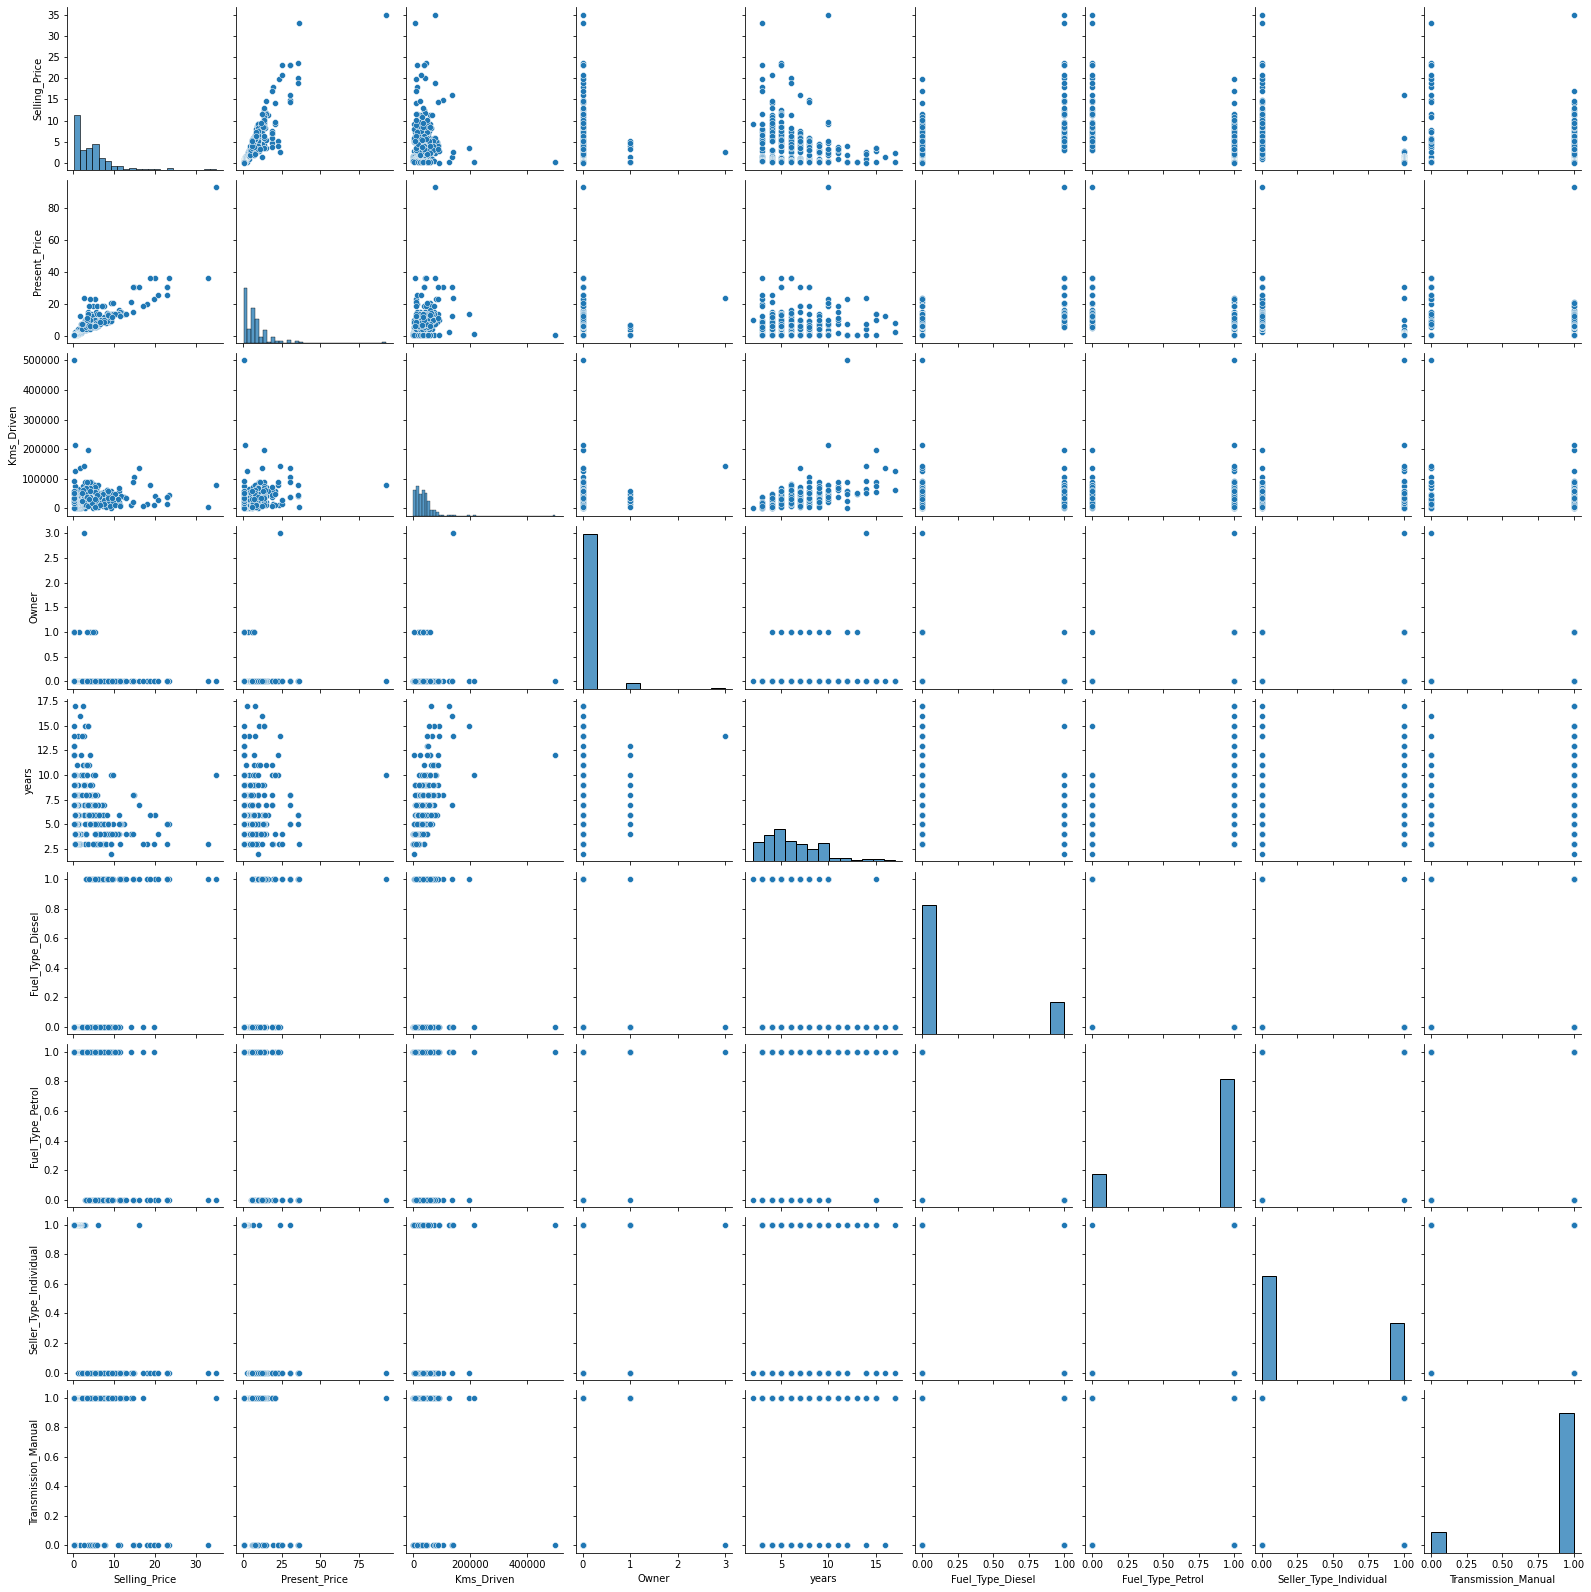

In [11]:
sns.pairplot(final_df)

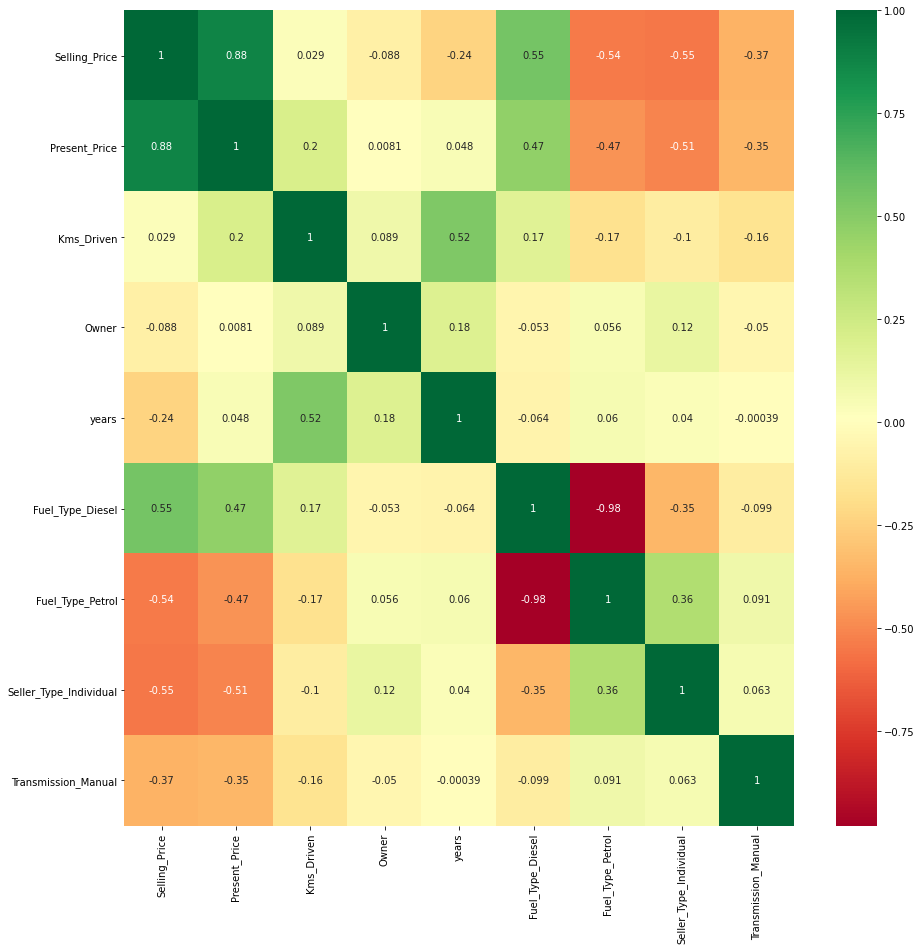

In [12]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(correlations,annot=True,cmap='RdYlGn')

In [13]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]


In [15]:
X.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [16]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Extract importance features

In [17]:

model = ExtraTreesRegressor()
model.fit(X,y)
model.feature_importances_

array([0.36920147, 0.04074589, 0.00047405, 0.07754551, 0.2349888 ,
       0.01436832, 0.12192985, 0.14074611])

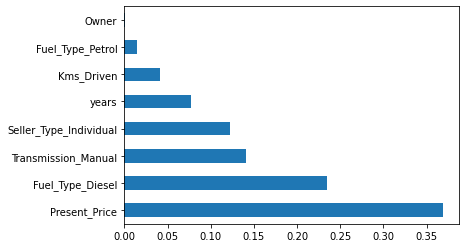

In [18]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(len(X.columns)).plot(kind='barh')

## Split data to train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f'X train shape ==> {X_train.shape}')
print(f'X test shape ==> {X_test.shape}')
print(f'y train shape ==> {y_train.shape}')
print(f'y test shape ==> {y_test.shape}')

X train shape ==> (240, 8)
X test shape ==> (61, 8)
y train shape ==> (240,)
y test shape ==> (61,)


## Hyperparameters

In [25]:
rf = RandomForestRegressor()
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# number of features
max_features = ['auto','sqrt']
# max level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num =6)]
# min number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# max number of samples required at each node
min_samples_leaf = [1, 2, 5, 10]
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
}

## Training the model

In [29]:

rf_random = RandomizedSearchCV(
    cv=5,
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 40,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs = 1,
    random_state=42,
)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


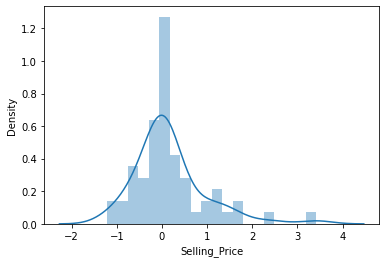

In [30]:
predictions = rf_random.predict(X_test)
sns.distplot(y_test-predictions)

## Load the model

In [32]:

file = open('random_forest_model.pkl','wb')

pickle.dump(rf_random,file)